In [17]:
import os
import pandas as pd
import h5py

import matplotlib.pyplot as plt


from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [18]:
import os
import pandas as pd
import h5py
import numpy as np

path = "/lcrc/project/EE-ECP/toli/data/FCC_CLD/data/"
file_template = "gev91ee_zboson_mm_{:03d}_CLD_RECO_edm4hep.hdf5"

# File numbers from 010 to 019
file_numbers = range(10,11)

# Lists to store data from multiple files
mc_data = []
inTrack_data = []
recon_data = []
siTrack_data = []
siTrack_trkstate_data = []

for num in file_numbers:
    file = file_template.format(num)
    file_path = os.path.join(path, file)

    with h5py.File(file_path, 'r') as hdf_file:
        
        #print(f"Reading: {file}")

        mcParticle = hdf_file["MCParticles"]
        inTracker = hdf_file["InnerTrackerBarrelCollection"]
        recon = hdf_file["PandoraPFOs"]
        siTrack = hdf_file["SiTracks"]
        siTrackState = hdf_file["_SiTracks_trackStates"]

        # Convert to DataFrame
        mc_data.append(pd.DataFrame({dataset_name: mcParticle[dataset_name][:] for dataset_name in mcParticle.keys()}))
        inTrack_data.append(pd.DataFrame({dataset_name: inTracker[dataset_name][:] for dataset_name in inTracker.keys()}))
        recon_data.append(pd.DataFrame({dataset_name: recon[dataset_name][:] for dataset_name in recon.keys()}))
        siTrack_data.append(pd.DataFrame({dataset_name: siTrack[dataset_name][:] for dataset_name in siTrack.keys()}))
        siTrack_trkstate_data.append(pd.DataFrame({dataset_name: siTrackState[dataset_name][:] for dataset_name in siTrackState.keys()}))


# Concatenate all DataFrames and assign to original names
df_mc = pd.concat(mc_data, ignore_index=True)
df_inTrack = pd.concat(inTrack_data, ignore_index=True)
df_recon = pd.concat(recon_data, ignore_index=True)
df_siTrack = pd.concat(siTrack_data, ignore_index=True)
df_siTrackState = pd.concat(siTrack_trkstate_data, ignore_index=True)

# Print the datasets and size
print(f"MCParticles: {df_mc.keys()}, shape: {df_mc.shape}")
print(f"InnerTracker: {df_inTrack.keys()}, shape: {df_inTrack.shape}")
print(f"PandoraPFOs: {df_recon.keys()}, shape: {df_recon.shape}")
print(f"siTrack: {df_siTrack.keys()}, shape: {df_siTrack.shape}")
print(f"siTrackStates: {df_siTrackState.keys()}, shape: {df_siTrackState.shape}")

MCParticles: Index(['PDG', 'charge', 'daughters_begin', 'daughters_end', 'endpoint.x',
       'endpoint.y', 'endpoint.z', 'generatorStatus', 'mass', 'momentum.x',
       'momentum.y', 'momentum.z', 'momentumAtEndpoint.x',
       'momentumAtEndpoint.y', 'momentumAtEndpoint.z', 'parents_begin',
       'parents_end', 'simulatorStatusDG', 'time', 'vertex.x', 'vertex.y',
       'vertex.z'],
      dtype='object'), shape: (1000, 22)
InnerTracker: Index(['cellID', 'eDep', 'momentumX', 'momentumY', 'momentumZ', 'pathLength',
       'positionX', 'positionY', 'positionZ', 'quality', 'time'],
      dtype='object'), shape: (1000, 11)
PandoraPFOs: Index(['PDG', 'charge', 'cluster_begin', 'cluster_end', 'energy', 'mass',
       'momentumX', 'momentumY', 'momentumZ', 'particles_begin',
       'particles_end', 'referencePointX', 'referencePointY',
       'referencePointZ', 'tracks_begin', 'tracks_end'],
      dtype='object'), shape: (1000, 16)
siTrack: Index(['chi2', 'ndf', 'trackStates_begin', 'trackS

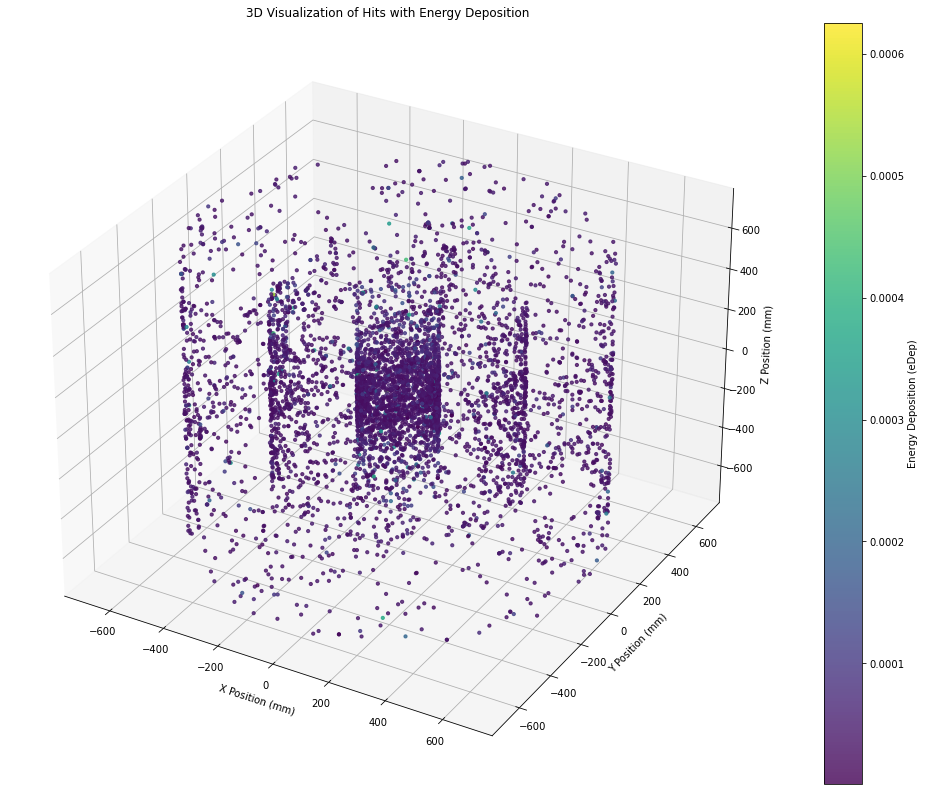

In [19]:
# Extract hit positions and energy deposition
x_positions = np.concatenate(df_inTrack["positionX"])
y_positions = np.concatenate(df_inTrack["positionY"])
z_positions = np.concatenate(df_inTrack["positionZ"])
eDep_values = np.concatenate(df_inTrack["eDep"])

# Create a 3D scatter plot
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, projection='3d')

# Use eDep for coloring or sizing
scatter = ax.scatter(x_positions, y_positions, z_positions, c=eDep_values, cmap='viridis', s=10, alpha=0.8)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Energy Deposition (eDep)')

# Add axis labels
ax.set_xlabel("X Position (mm)")
ax.set_ylabel("Y Position (mm)")
ax.set_zlabel("Z Position (mm)")

plt.title("3D Visualization of Hits with Energy Deposition")
plt.show()

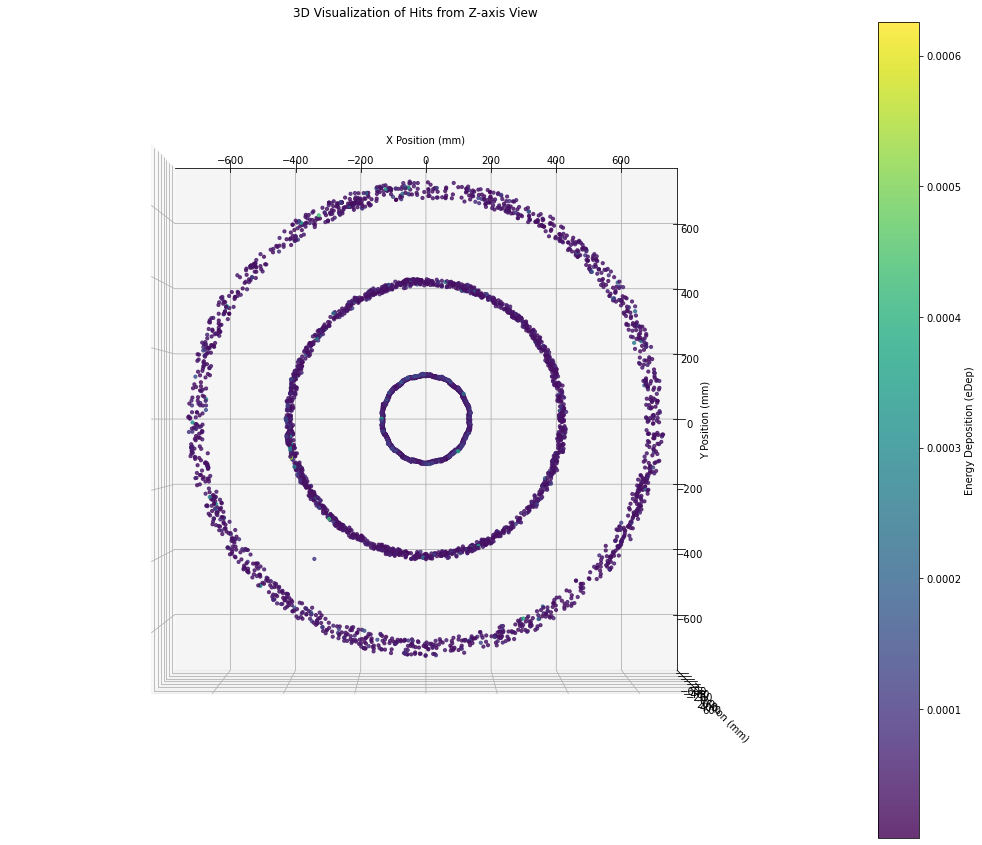

In [20]:
# view along Z axis
x_positions = np.concatenate(df_inTrack["positionX"])
y_positions = np.concatenate(df_inTrack["positionY"])
z_positions = np.concatenate(df_inTrack["positionZ"])
eDep_values = np.concatenate(df_inTrack["eDep"])

# Create a 3D scatter plot
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with energy deposition as color
scatter = ax.scatter(x_positions, y_positions, z_positions, c=eDep_values, cmap='viridis', s=10, alpha=0.8)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Energy Deposition (eDep)')

# Set axis labels
ax.set_xlabel("X Position (mm)")
ax.set_ylabel("Y Position (mm)")
ax.set_zlabel("Z Position (mm)")

# Rotate the view to look along the Z-axis
ax.view_init(elev=90, azim=-90)  # Adjust elevation and azimuth for Z-axis view

plt.title("3D Visualization of Hits from Z-axis View")
plt.show()

In [21]:
# Calculate radius for each entry
df_inTrack["radius_l0"] = [np.sqrt(np.array(x)**2 + np.array(y)**2) for x, y in zip(df_inTrack['positionX'], df_inTrack['positionY'])]

## select only the innermost layer and convert to cylindrical coordinate

In [26]:
df_inTrackl0 = []  

for index, row in df_inTrack.iterrows():
    r_val = row["radius_l0"]
    x_val = row["positionX"]
    y_val = row["positionY"]
    z_val = row["positionZ"]
    eDep_val = row["eDep"]
    
    #list to store each row data
    row_data = {
        "positionX": [],
        "positionY": [],
        "positionZ": [],
        "eDep": [],
        "radius": []
    }
    
    
    #filter based on radius threshold
    for r, x, y, z, e in zip(r_val, x_val, y_val, z_val, eDep_val):
        if r < 200:
            row_data["positionX"].append(x)
            row_data["positionY"].append(y)
            row_data["positionZ"].append(z)
            row_data["eDep"].append(e)
            row_data["radius"].append(r)
    
    #append to the main list
    df_inTrackl0.append(row_data)
            

#convert filtered values to pandas
df_inTrackl0 = pd.DataFrame(df_inTrackl0)

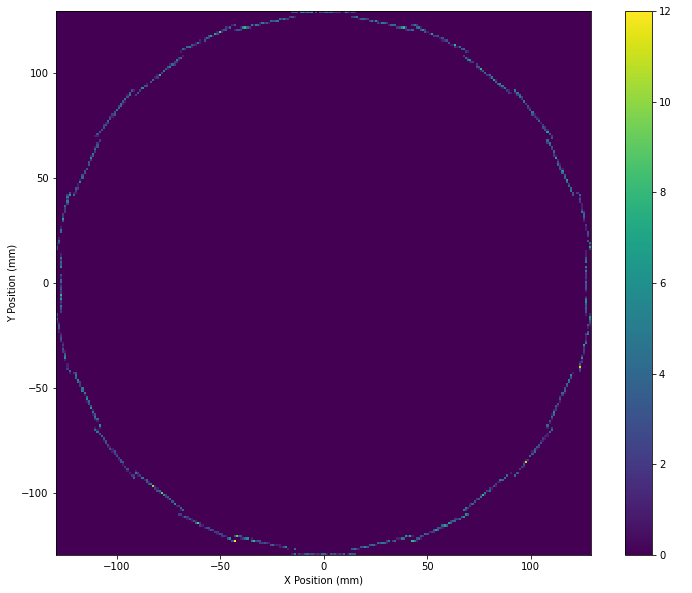

In [27]:
# view along Z axis (Innermost layer)
x_positions = np.concatenate(df_inTrackl0["positionX"])
y_positions = np.concatenate(df_inTrackl0["positionY"])

plt.figure(figsize=(12, 10))
plt.hist2d(x_positions, y_positions, bins=250, cmap='viridis')
plt.colorbar(label=" ")
plt.xlabel("X Position (mm)")
plt.ylabel("Y Position (mm)")
plt.show()

In [28]:
import numpy as np
import plotly.graph_objects as go

# Extract actual 3D positions
x_positions = np.concatenate(df_inTrackl0["positionX"])
y_positions = np.concatenate(df_inTrackl0["positionY"])
z_positions = np.concatenate(df_inTrackl0["positionZ"])

# Plot 3D scatter
fig = go.Figure(data=go.Scatter3d(
    x=x_positions,
    y=y_positions,
    z=z_positions,
    mode='markers',
    marker=dict(
        size=2,
        opacity=0.6,
        color=z_positions,       # You can color by Z or something else
        colorscale='Viridis',
        colorbar=dict(title="Z (mm)")
    )
))

fig.update_layout(
    title='Interactive 3D View of Sensor Hits',
    scene=dict(
        xaxis_title='X Position (mm)',
        yaxis_title='Y Position (mm)',
        zaxis_title='Z Position (mm)',
    ),
    width=900,
    height=800
)

fig.show()


### Sensor Positions of Innermost Layer

In [8]:
df_sensor = pd.read_csv('./sensor_position_L0.csv')
df_sensor

Sensor     x (cm)    y (cm)  z (cm)
0         0  12.700000  0.000000 -46.655
1         1  12.700000  0.000000 -43.645
2         2  12.700000  0.000000 -40.635
3         3  12.700000  0.000000 -37.625
4         4  12.700000  0.000000 -34.615
..      ...        ...       ...     ...
891     891  12.625316 -2.881646  34.615
892     892  12.625316 -2.881646  37.625
893     893  12.625316 -2.881646  40.635
894     894  12.625316 -2.881646  43.645
895     895  12.625316 -2.881646  46.655

[896 rows x 4 columns]

In [9]:
# Add 'phi' column to the DataFrame
df_inTrackl0['phi'] = df_inTrackl0.apply(
    lambda row: [np.arctan2(y, x) for x, y in zip(row['positionX'], row['positionY'])],
    axis=1
)

In [10]:
# # Flatten the Z arrays for plotting
# track_Z = np.concatenate(df_recon['referencePointZ'].values)
# hit_Z = np.concatenate(df_inTrackl0['positionZ'].values)

# # Plot the histogram
# plt.figure(figsize=(10, 6))
# plt.hist(track_Z, bins=50, alpha=0.7, label="Reconstructed Tracks (Z)", color='blue', edgecolor='black')
# plt.hist(hit_Z, bins=50, alpha=0.7, label="Hits (Z)", color='orange', edgecolor='black')
# plt.xlabel("Z (cm)")
# plt.ylabel("Frequency")
# plt.title("Distribution of Z Values")
# plt.legend()
# plt.grid(alpha=0.5)
# plt.show()


In [11]:
# # Adjust this to choose a different track
# row_index = 1
# track_data = df_recon.iloc[row_index]

# # Use df_recon to extract the reference points
# track_x = np.array(df_recon.iloc[row_index]["referencePointX"])
# track_y = np.array(df_recon.iloc[row_index]["referencePointY"])
# track_z = np.array(df_recon.iloc[row_index]["referencePointZ"])


# # Ensure they are 1D arrays (wrap single values in a list)
# if track_x.ndim == 0:
#     track_x = np.array([track_x])
# if track_y.ndim == 0:
#     track_y = np.array([track_y])
# if track_z.ndim == 0:
#     track_z = np.array([track_z])


# # Create a 3D plot
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Plot the track as a line
# ax.plot(track_x, track_y, track_z, label=f"Track {row_index}", linestyle='-', color='b', alpha=0.6)

# # Mark the starting point
# ax.scatter(track_x[0], track_y[0], track_z[0], color='g', s=100, label="Start Point", marker='o')

# # Mark the endpoint
# ax.scatter(track_x[-1], track_y[-1], track_z[-1], color='r', s=100, label="End Point", marker='x')

# # Mark intermediate points
# if len(track_x) > 2:
#     ax.scatter(track_x[1:-1], track_y[1:-1], track_z[1:-1], color='orange', s=50, label="Intermediate Points", marker='^')

# # Label axes
# ax.set_xlabel("X Position (cm)")
# ax.set_ylabel("Y Position (cm)")
# ax.set_zlabel("Z Position (cm)")

# # Add title and legend
# plt.title(f"3D Visualization of Track {row_index}")
# ax.legend()

# # Show plot
# plt.show()


In [12]:
# # Flatten the radius and positionZ data for plotting
# radius_flat = np.concatenate(df_inTrackl0["radius"])
# z_flat = np.concatenate(df_inTrackl0["positionZ"])

# # Plot radius vs. z
# plt.figure(figsize=(10, 6))
# plt.scatter(z_flat, radius_flat, s=10, alpha=0.7, c='purple')
# plt.xlabel("Z Position (cm)")
# plt.ylabel("Radius (cm)")
# plt.title("Radius vs. Z (Cylindrical View)")
# plt.grid(True)
# plt.show()

In [13]:
# # Flatten the phi and positionZ data for plotting
# phi_flat = np.concatenate(df_inTrackl0["phi"])
# z_flat = np.concatenate(df_inTrackl0["positionZ"])

# # Plot phi vs. z
# plt.figure(figsize=(10, 6))
# plt.scatter(z_flat, phi_flat, s=10, alpha=0.7, c='orange')
# plt.xlabel("Z Position (cm)")
# plt.ylabel("Phi (radians)")
# plt.title("Phi vs. Z (Cylindrical View)")
# plt.grid(True)
# plt.show()

In [14]:
# from mpl_toolkits.mplot3d import Axes3D

# def plot_3d_tracks(df_mc, entry_index):
#     """Visualize particle tracks in 3D space for a specific event entry."""
#     event = df_mc.iloc[entry_index]
#     vertices = list(zip(event["vertex.x"], event["vertex.y"], event["vertex.z"]))
#     endpoints = list(zip(event["endpoint.x"], event["endpoint.y"], event["endpoint.z"]))

#     fig = plt.figure(figsize=(10, 8))
#     ax = fig.add_subplot(111, projection='3d')

#     for i in range(len(vertices)):
#         x_vals = [vertices[i][0], endpoints[i][0]]
#         y_vals = [vertices[i][1], endpoints[i][1]]
#         z_vals = [vertices[i][2], endpoints[i][2]]
#         ax.plot(x_vals, y_vals, z_vals, label=f"Particle {i} (PDG: {event['PDG'][i]})")

#     ax.set_xlabel("X [mm]")
#     ax.set_ylabel("Y [mm]")
#     ax.set_zlabel("Z [mm]")
#     ax.set_title(f"3D Particle Tracks for Event {entry_index}")
#     plt.legend()
#     plt.show()

# # Example: Plot 3D tracks for entry 1
# plot_3d_tracks(df_mc, entry_index=5)

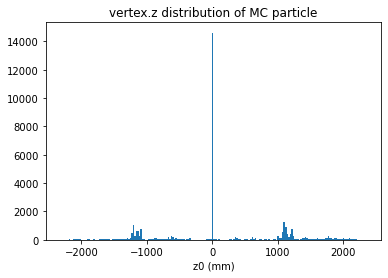

In [15]:
z_dist = np.concatenate(df_mc["vertex.z"])
plt.hist(z_dist,bins=200)
plt.title("vertex.z distribution of MC particle")
plt.xlabel("z0 (mm)")
#plt.xlim(-1250,-1000)
plt.show()

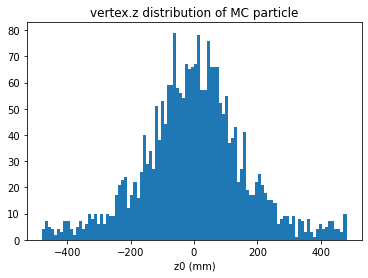

In [16]:
z_dist = np.concatenate(df_inTrackl0["positionZ"])
plt.hist(z_dist,bins=100)
plt.title("vertex.z distribution of MC particle")
plt.xlabel("z0 (mm)")
#plt.xlim(-100,100)
plt.show()

### Filter muon tracks

In [17]:
def filter_muons(df_mc):
    """
    Filters only muon (PDG = ±13) tracks from MCParticle dataset.
    """
    muons = []
    
    for idx, row in df_mc.iterrows():
        pdg = np.array(row["PDG"])
        charge = np.array(row["charge"])
        gen_status = np.array(row["generatorStatus"])
        
        # Select only muons (PDG = ±13)
        #muon_mask = (np.abs(pdg) == 13)& (gen_status == 3)  
        #muon_mask = np.abs(pdg) == 13
        muon_mask = (np.abs(pdg) == 13) & (charge > 0)

        
        if np.any(muon_mask):
            muons.append({
                "PDG": pdg[muon_mask],
                "charge": charge[muon_mask],
                "x0": np.array(row["vertex.x"])[muon_mask],
                "y0": np.array(row["vertex.y"])[muon_mask],
                "z0": np.array(row["vertex.z"])[muon_mask],
                "px": np.array(row["momentum.x"])[muon_mask],
                "py": np.array(row["momentum.y"])[muon_mask],
                "pz": np.array(row["momentum.z"])[muon_mask],
                "mass": np.array(row["mass"])[muon_mask],
                "genStatus": np.array(row["generatorStatus"])[muon_mask]
            })
    
    return pd.DataFrame(muons)

# Apply the function
df_mcMuons = filter_muons(df_mc)

In [18]:
def compute_track_parameters(df_mcMuons):
    
    pT_list, theta_list, phi_list, tan_lambda_list = [], [], [], []

    # Iterate through each row
    for _, row in df_mcMuons.iterrows():
        px, py, pz = np.array(row["px"]), np.array(row["py"]), np.array(row["pz"])
        
        # Compute pT, theta, phi, and tan_lambda
        pT = np.sqrt(px**2 + py**2)
        theta = np.arctan2(pT, pz)
        phi = np.arctan2(py, px)
        tan_lambda = pz / pT

        # Append results
        pT_list.append(pT.tolist())
        theta_list.append(theta.tolist())
        phi_list.append(phi.tolist())
        tan_lambda_list.append(tan_lambda.tolist())

    # update the dataframe with new columns
    df_mcMuons["pT"] = pT_list
    df_mcMuons["theta"] = theta_list
    df_mcMuons["phi"] = phi_list
    df_mcMuons["tan_lambda"] = tan_lambda_list

    return df_mcMuons  # Returns updated DataFrame

# **Run function to update df_mcMuons**
df_mcMuons = compute_track_parameters(df_mcMuons)

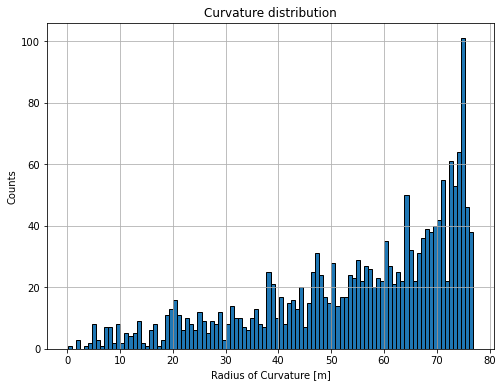

In [19]:
B = 2  # Tesla
radius = df_mcMuons["pT"].apply(lambda r: np.array(r) / (0.3 * B))

# Flatten all arrays in 'radius' into a single array
radius_values = np.concatenate(radius.values)

# Plotting the histogram of radius values
plt.figure(figsize=(8, 6))
plt.hist(radius_values, bins=100, edgecolor='black')
plt.xlabel("Radius of Curvature [m]")
plt.ylabel("Counts")
plt.title("Curvature distribution")
plt.grid(True)
plt.show()

### Find Track Intersection from Track Parameters

In [20]:
# def compute_track_intersections(df_siTrackState, df_inTrackl0):
#     intersections = []

#     for track_index, track_row in df_siTrackState.iterrows():
#         # Extract track parameters
#         d0 = np.array(track_row["D0"])  
#         z0 = np.array(track_row["Z0"])  
#         omega = np.array(track_row["omega"])  
#         phi0 = np.array(track_row["phi"])  
#         tan_lambda = np.array(track_row["tanLambda"])  
        
#         # Compute x0, y0 (track center in transverse plane)
#         x0 = -d0 * np.sin(phi0)
#         y0 = d0 * np.cos(phi0)
        
#         # Compute track radius
#         R = np.abs(1 / omega)
        
#         for hit_index, hit_row in df_inTrackl0.iterrows():
#             # Extract hit positions
#             x_hit_values = np.array(hit_row["positionX"])  
#             y_hit_values = np.array(hit_row["positionY"])
#             z_hit_values = np.array(hit_row["positionZ"])
            
#             for i in range(len(x_hit_values)):  # Loop over each hit
#                 x_hit = x_hit_values[i]
#                 y_hit = y_hit_values[i]
#                 z_hit = z_hit_values[i]

#                 # Compute hit radius
#                 r_hit = np.sqrt(x_hit**2 + y_hit**2)

#                 # Solve for psi using the track equation
#                 #psi = phi0 - np.arctan2(y_hit - y0 + R*np.sin(phi0), x_hit - x0 + np.cos(phi0))
                
#                 psi = (z_hit - z0)* tan_lambda/R

                
#                 # Compute track intersection points
#                 x_intersect = x0 + R * (np.cos(phi0 - psi) - np.cos(phi0))
#                 y_intersect = y0 + R * (np.sin(phi0 - psi) - np.sin(phi0))
#                 z_intersect = z0 + (R * psi) / tan_lambda
                
#                 # Compute distance between hit and track intersection
#                 distance = np.sqrt((x_hit - x_intersect)**2 + (y_hit - y_intersect)**2 + (z_hit - z_intersect)**2)

#                 intersections.append({
#                     "track_index": track_index,
#                     "hit_index": hit_index,
#                     "x_intersect": x_intersect,
#                     "y_intersect": y_intersect,
#                     "z_intersect": z_intersect,
#                     "distance": distance
#                 })
    
#     return pd.DataFrame(intersections)

# # Run function
# df_track_intersections = compute_track_intersections(df_siTrackState, df_inTrackl0)


In [21]:
# # Flatten the lists from df_track_intersections
# x_intersect = np.concatenate(df_track_intersections['x_intersect'].values)
# y_intersect = np.concatenate(df_track_intersections['y_intersect'].values)
# z_intersect = np.concatenate(df_track_intersections['z_intersect'].values)

# # Flatten the lists from df_inTrackl0
# positionX = np.concatenate(df_inTrackl0['positionX'].values)
# positionY = np.concatenate(df_inTrackl0['positionY'].values)
# positionZ = np.concatenate(df_inTrackl0['positionZ'].values)

# # Create 3D plot
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')

# # Plot track intersections
# ax.scatter(x_intersect, y_intersect, z_intersect, color='blue', label='Track Intersections', marker='o', alpha=0.6)

# # Plot sensor hits
# ax.scatter(positionX, positionY, positionZ, color='red', label='Sensor Hits', marker='^', alpha=0.8)

# # Labels and title
# ax.set_xlabel('X Position')
# ax.set_ylabel('Y Position')
# ax.set_zlabel('Z Position')
# ax.set_title('Overlay of Track Intersections and Sensor Hits')
# ax.legend()

# # Show plot
# plt.show()



In [22]:
# # Create histogram plots for X, Y, and Z
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# # X Histogram (Line Plot)
# #axes[0].hist(x_intersect, bins=100, histtype='step', label='Track Intersections', color='blue', linewidth=2)
# axes[0].hist(positionX, bins=100, histtype='step', label='Sensor Hits', color='red', linewidth=2)
# axes[0].set_xlabel('X Position')
# axes[0].set_ylabel('Frequency')
# axes[0].legend()

# # Y Histogram (Line Plot)
# #axes[1].hist(y_intersect, bins=100, histtype='step', label='Track Intersections', color='blue', linewidth=2)
# axes[1].hist(positionY, bins=100, histtype='step', label='Sensor Hits', color='red', linewidth=2)
# axes[1].set_xlabel('Y Position')
# axes[1].set_ylabel('Frequency')
# axes[1].legend()

# # Z Histogram (Line Plot)
# #axes[2].hist(z_intersect, bins=100, histtype='step', label='Track Intersections', color='blue', linewidth=2)
# axes[2].hist(positionZ, bins=100, histtype='step', label='Sensor Hits', color='red', linewidth=2)
# axes[2].set_xlabel('Z Position')
# axes[2].set_ylabel('Frequency')
# axes[2].legend()

# plt.suptitle("Track Intersections vs Sensor Hits (Line Histogram)")
# plt.show()


In [23]:
# # Create histogram plots for X, Y, and Z
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# # X Histogram (Line Plot)
# axes[0].hist(x_intersect, bins=100, histtype='step', label='Track Intersections', color='blue', linewidth=2)
# #axes[0].hist(positionX, bins=100, histtype='step', label='Sensor Hits', color='red', linewidth=2)
# axes[0].set_xlabel('X Position')
# axes[0].set_ylabel('Frequency')
# axes[0].legend()

# # Y Histogram (Line Plot)
# axes[1].hist(y_intersect, bins=100, histtype='step', label='Track Intersections', color='blue', linewidth=2)
# #axes[1].hist(positionY, bins=100, histtype='step', label='Sensor Hits', color='red', linewidth=2)
# axes[1].set_xlabel('Y Position')
# axes[1].set_ylabel('Frequency')
# axes[1].legend()

# # Z Histogram (Line Plot)
# axes[2].hist(z_intersect, bins=100, histtype='step', label='Track Intersections', color='blue', linewidth=2)
# #axes[2].hist(positionZ, bins=100, histtype='step', label='Sensor Hits', color='red', linewidth=2)
# axes[2].set_xlabel('Z Position')
# axes[2].set_ylabel('Frequency')
# axes[2].legend()

# plt.suptitle("Track Intersections positions")
# plt.show()


In [24]:
df_mcMuons.head(5)

PDG        charge                    x0  \
0                 [-13]           [1]                 [0.0]   
1  [-13, -13, -13, -13]  [1, 1, 1, 1]  [0.0, 0.0, 0.0, 0.0]   
2            [-13, -13]        [1, 1]            [0.0, 0.0]   
3            [-13, -13]        [1, 1]            [0.0, 0.0]   
4                 [-13]           [1]                 [0.0]   

                     y0                    z0  \
0                 [0.0]                 [0.0]   
1  [0.0, 0.0, 0.0, 0.0]  [0.0, 0.0, 0.0, 0.0]   
2            [0.0, 0.0]            [0.0, 0.0]   
3            [0.0, 0.0]            [0.0, 0.0]   
4                 [0.0]                 [0.0]   

                                                px  \
0                                     [-29.397411]   
1  [-1.8415887, -1.8414414, -1.841382, -1.8413576]   
2                           [21.148071, 20.738178]   
3                         [-26.706099, -26.706081]   
4                                     [-17.688356]   

                                             py  \
0                                  [-21.403616]   
1  [14.707873, 14.706696, 14.706227, 14.706025]   
2                      [-25.885456, -25.392939]   
3                        [25.590157, 25.590137]   
4                                   [38.300022]   

                                                 pz  \
0                                       [26.599277]   
1  [-42.983105, -42.979668, -42.978294, -42.977707]   
2                            [31.327919, 30.725052]   
3                          [-25.788853, -25.788834]   
4                                      [-16.307438]   

                                   mass     genStatus  \
0                             [0.10566]           [1]   
1  [0.10566, 0.10566, 0.10566, 0.10566]  [3, 3, 3, 1]   
2                    [0.10566, 0.10566]        [3, 1]   
3                    [0.10566, 0.10566]        [3, 1]   
4                             [0.10566]           [1]   

                                                  pT  \
0                                [36.36375427246094]   
1  [14.822718620300293, 14.821531295776367, 14.82...   
2            [33.426002502441406, 32.78526306152344]   
3            [36.98745346069336, 36.987430572509766]   
4                                [42.18731689453125]   

                                               theta  \
0                               [0.9392552375793457]   
1  [2.8095133304595947, 2.8095133304595947, 2.809...   
2           [0.8177877068519592, 0.8178257942199707]   
3           [2.1796624660491943, 2.1796624660491943]   
4                                [1.939652919769287]   

                                                 phi  \
0                              [-2.5122697353363037]   
1  [1.6953591108322144, 1.6953591108322144, 1.695...   
2         [-0.8857831358909607, -0.8859606385231018]   
3             [2.377530097961426, 2.377530097961426]   
4                               [2.0034499168395996]   

                                          tan_lambda  
0                               [0.7314777374267578]  
1  [-2.8998124599456787, -2.899812936782837, -2.8...  
2           [0.9372320175170898, 0.9371604323387146]  
3         [-0.6972324252128601, -0.6972323656082153]  
4                             [-0.38654834032058716]

### Using MCParticle Info Method 1

In [25]:
B = 2  # inner_field (Solenoid Field) in hepSim website

def compute_track_intersections(df_mcMuons, df_inTrackl0):
    intersections = []

    
    for hit_index, hit_row in df_inTrackl0.iterrows():
        x_hit_values = np.array(hit_row["positionX"])
        y_hit_values = np.array(hit_row["positionY"])
        z_hit_values = np.array(hit_row["positionZ"])
            
        for i in range(len(x_hit_values)):
            x_hit = x_hit_values[i]
            y_hit = y_hit_values[i]
            z_hit = z_hit_values[i]

            dist = -1.
            
            for track_index, track_row in df_mcMuons.iterrows():
                z0_values = np.array(track_row["z0"])
                x0_values = np.array(track_row["x0"])
                y0_values = np.array(track_row["y0"])
                pT_values = np.array(track_row["pT"]) 
                phi0_values = np.array(track_row["phi"])
                charge_values = np.array(track_row["charge"])
                theta_values = np.array(track_row["theta"])
                tan_lambda_values = np.array(track_row["tan_lambda"]) 
                lambda_angle_values = np.arctan(tan_lambda_values)
                genStatus_values = np.array(track_row["genStatus"])

                R_values = np.array(pT_values/0.3*B)  #  R = pT/(0.3qB)
                
                for muon_index in range(len(x0_values)):
                    pT = pT_values[muon_index]
                    charge = charge_values[muon_index]
                    z0 = z0_values[muon_index] 
                    x0 = x0_values[muon_index]
                    y0 = y0_values[muon_index]
                    phi0 = phi0_values[muon_index]
                    tan_lambda = tan_lambda_values[muon_index]
                    lambda_angle = lambda_angle_values[muon_index]
                    theta_angle = theta_values[muon_index]
                    genStatus = genStatus_values[muon_index]
                    R = R_values[muon_index]*1000 ##mm

                    psi = (z_hit - z0)* charge* np.tan(theta_angle)/R
                    
                    x_intersect = x0 + R*np.sin(psi + phi0) - R*np.sin(phi0)
                    y_intersect = y0 + R*np.cos(psi + phi0) - R*np.cos(phi0)
                    z_intersect = z0 + (R * psi)/(np.tan(theta_angle))
                    
                    resid = np.sqrt((x_intersect-x_hit)**2 + (y_intersect-y_hit)**2 + (z_intersect-z_hit)**2 )

                    if (dist < 0 ) or resid < dist: 
                        dist = resid
                        min_track_index = track_index
                        min_x_intersect = x_intersect
                        min_y_intersect = y_intersect
                        min_z_intersect = z_intersect
                        pT_value = pT
                        phi0_value = phi0
                
            # Store with proper indexing information
            if dist >= 0:
                intersections.append({
                    "hit_index": hit_index,
                    "sensor_hit_index": i,
                    "track_index": min_track_index,
                    "x_intersect": min_x_intersect,
                    "y_intersect": min_y_intersect,
                    "z_intersect": min_z_intersect,
                    "x_hit": x_hit,
                    "y_hit": y_hit,
                    "z_hit": z_hit,
                    "pT": pT_value,
                    "phi0": phi0_value,
                    "genStatus":genStatus,
                    "distance": dist
                })
    
    return pd.DataFrame(intersections)

# # Run function
df_track_intersections = compute_track_intersections(df_mcMuons, df_inTrackl0)

### Using MCParticle Info

In [26]:
# B = 2  # inner_field (Solenoid Field) in hepSim website

# def compute_track_intersections(df_mcMuons, df_inTrackl0):
#     intersections = []

    
#     for hit_index, hit_row in df_inTrackl0.iterrows():
#         x_hit_values = np.array(hit_row["positionX"])
#         y_hit_values = np.array(hit_row["positionY"])
#         z_hit_values = np.array(hit_row["positionZ"])
            
#         for i in range(len(x_hit_values)):
#             x_hit = x_hit_values[i]
#             y_hit = y_hit_values[i]
#             z_hit = z_hit_values[i]

#             dist = -1.
            
#             for track_index, track_row in df_mcMuons.iterrows():
#                 x0_values = np.array(track_row["x0"])
#                 y0_values = np.array(track_row["y0"])
#                 z0_values = np.array(track_row["z0"])
#                 pT_values = np.array(track_row["pT"]) 
#                 phi0_values = np.array(track_row["phi"])
#                 charge_values = np.array(track_row["charge"])
#                 tan_lambda_values = np.array(track_row["tan_lambda"]) 
#                 lambda_angle_values = np.arctan(tan_lambda_values)

#                 R_values = np.abs(pT_values/0.3*B)  #  R = pT/(qB), careful with units!
                
#                 for muon_index in range(len(x0_values)):
#                     x0 = x0_values[muon_index]
#                     y0 = y0_values[muon_index]
#                     z0 = z0_values[muon_index]
#                     pT = pT_values[muon_index]
#                     phi0 = phi0_values[muon_index]
#                     charge = charge_values[muon_index]
#                     tan_lambda = tan_lambda_values[muon_index]
#                     lambda_angle = lambda_angle_values[muon_index]
#                     R = R_values[muon_index]*1000 ##mm
#                     #R = pT/(charge*B)
    
#                     # calculate the helix path length 's' from z-equation
#                     s_param = (z_hit - z0)/np.sin(lambda_angle)

#                     # calculate intersection using helix equations clearly
#                     x_intersect = x0 + R * (np.cos(phi0 + (charge * s_param * np.cos(lambda_angle)/R)) - np.cos(phi0))
#                     y_intersect = y0 + R * (np.sin(phi0 + (charge * s_param * np.cos(lambda_angle) / R)) - np.sin(phi0))
#                     z_intersect = z0 + s_param*np.sin(lambda_angle)

#                     resid = np.sqrt((x_intersect-x_hit)**2 + (y_intersect-y_hit)**2 + (z_intersect-z_hit)**2 )

#                     if (dist < 0 ) or resid < dist: 
#                         dist = resid
#                         min_track_index = track_index
#                         min_x_intersect = x_intersect
#                         min_y_intersect = y_intersect
#                         min_z_intersect = z_intersect
#                         pT_value = pT
#                         phi0_value = phi0

                
#             # Store with proper indexing information
#             if dist >= 0:
#                 intersections.append({
#                     "hit_index": hit_index,
#                     "sensor_hit_index": i,
#                     "track_index": min_track_index,
#                     "x_intersect": min_x_intersect,
#                     "y_intersect": min_y_intersect,
#                     "z_intersect": min_z_intersect,
#                     "x_hit": x_hit,
#                     "y_hit": y_hit,
#                     "z_hit": z_hit,
#                     "pT": pT_value,
#                     "phi0": phi0_value,
#                     "distance": dist
#                 })
    
#     return pd.DataFrame(intersections)

# # # Run function
# df_track_intersections = compute_track_intersections(df_mcMuons, df_inTrackl0)

## cut in z

In [27]:
# B = 2  # inner_field (Solenoid Field) in hepSim website

# def compute_track_intersections(df_mcMuons, df_inTrackl0):
#     intersections = []

    
#     for hit_index, hit_row in df_inTrackl0.iterrows():
#         x_hit_values = np.array(hit_row["positionX"])
#         y_hit_values = np.array(hit_row["positionY"])
#         z_hit_values = np.array(hit_row["positionZ"])
            
#         for i in range(len(x_hit_values)):
#             x_hit = x_hit_values[i]
#             y_hit = y_hit_values[i]
#             z_hit = z_hit_values[i]

#             dist = -1.
            
#             for track_index, track_row in df_mcMuons.iterrows():
#                 x0_values = np.array(track_row["x0"])
#                 y0_values = np.array(track_row["y0"])
#                 z0_values = np.array(track_row["z0"])
#                 pT_values = np.array(track_row["pT"]) 
#                 phi0_values = np.array(track_row["phi"])
#                 charge_values = np.array(track_row["charge"])
#                 tan_lambda_values = np.array(track_row["tan_lambda"]) 
#                 lambda_angle_values = np.arctan(tan_lambda_values)

#                 R_values = np.abs(pT_values/0.3*B)  #  R = pT/(qB), careful with units!
                
#                 for muon_index in range(len(x0_values)):
                    
#                     z0 = z0_values[muon_index]
                    
#                     if z0!=0:
#                         continue
                    
#                     x0 = x0_values[muon_index]
#                     y0 = y0_values[muon_index]
#                     pT = pT_values[muon_index]
#                     phi0 = phi0_values[muon_index]
#                     charge = charge_values[muon_index]
#                     tan_lambda = tan_lambda_values[muon_index]
#                     lambda_angle = lambda_angle_values[muon_index]
#                     R = R_values[muon_index]*1000 ##mm
#                     #R = pT/(charge*B)
    
#                     # calculate the helix path length 's' from z-equation
#                     s_param = (z_hit - z0)/np.sin(lambda_angle)

#                     # calculate intersection using helix equations clearly
#                     x_intersect = x0 + R * (np.cos(phi0 + (charge * s_param * np.cos(lambda_angle)/R)) - np.cos(phi0))
#                     y_intersect = y0 + R * (np.sin(phi0 + (charge * s_param * np.cos(lambda_angle) / R)) - np.sin(phi0))
#                     z_intersect = z0 + s_param*np.sin(lambda_angle)

#                     resid = np.sqrt((x_intersect-x_hit)**2 + (y_intersect-y_hit)**2 + (z_intersect-z_hit)**2 )

#                     if (dist < 0 ) or resid < dist: 
#                         dist = resid
#                         min_track_index = track_index
#                         min_x_intersect = x_intersect
#                         min_y_intersect = y_intersect
#                         min_z_intersect = z_intersect
#                         pT_value = pT
#                         phi0_value = phi0

                
#             # Store with proper indexing information
#             if dist >= 0:
#                 intersections.append({
#                     "hit_index": hit_index,
#                     "sensor_hit_index": i,
#                     "track_index": min_track_index,
#                     "x_intersect": min_x_intersect,
#                     "y_intersect": min_y_intersect,
#                     "z_intersect": min_z_intersect,
#                     "x_hit": x_hit,
#                     "y_hit": y_hit,
#                     "z_hit": z_hit,
#                     "pT": pT_value,
#                     "phi0": phi0_value,
#                     "distance": dist
#                 })
    
#     return pd.DataFrame(intersections)

# # # Run function
# df_track_intersections = compute_track_intersections(df_mcMuons, df_inTrackl0)

In [28]:
df_track_intersections.head()

hit_index  sensor_hit_index  track_index  x_intersect  y_intersect  \
0          0                 0          617  -113.306965   -87.487659   
1          0                 1          617   110.013949    85.044021   
2          1                 0          391   -30.263987   136.898850   
3          1                 1          391    29.428708  -132.313756   
4          1                 2          391    29.435733  -132.345248   

   z_intersect       x_hit       y_hit       z_hit         pT      phi0  \
0    94.794456 -104.856277  -76.165741   94.794456  37.559933  2.483793   
1   -92.079544  106.419281   74.205795  -92.079544  37.559933  2.483793   
2  -370.102234  -15.532665  126.688499 -370.102234  16.098356 -1.789019   
3   357.808472   28.282276 -123.778488  357.808472  16.098356 -1.789019   
4   357.893646   28.313559 -123.808594  357.893646  16.098356 -1.789019   

   genStatus   distance  
0          1  14.127984  
1          1  11.418790  
2          1  17.923814  
3          1   8.611916  
4          1   8.610096

In [29]:
x_residuals = df_track_intersections["x_hit"] - df_track_intersections["x_intersect"]
y_residuals = df_track_intersections["y_hit"] - df_track_intersections["y_intersect"]
z_residuals = df_track_intersections["z_hit"] - df_track_intersections["z_intersect"]
pT = df_track_intersections["pT"]
phi0 = df_track_intersections["phi0"]
x_hit = df_track_intersections["x_hit"]
y_hit = df_track_intersections["y_hit"]
z_hit = df_track_intersections["z_hit"]

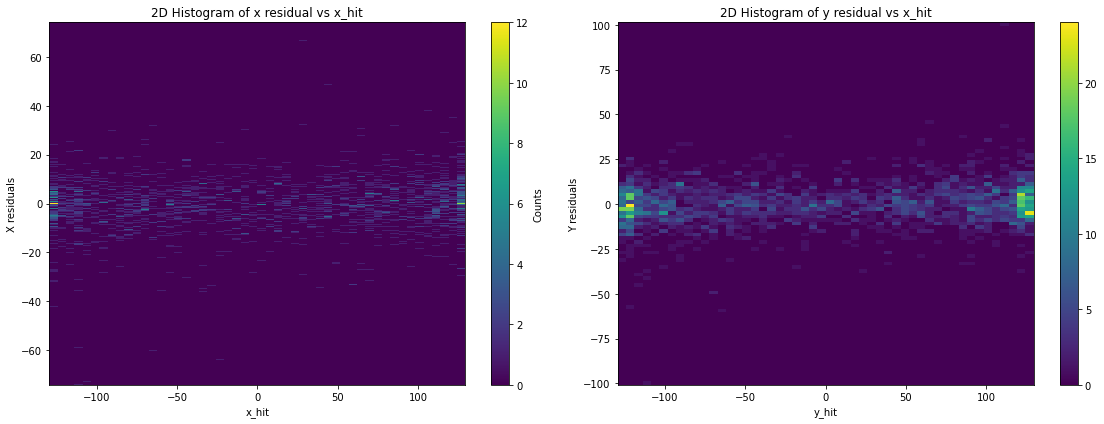

In [30]:
#Dependencies in hit positions?

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# First plot: x residual vs pT
h1 = axs[0].hist2d(x_hit, x_residuals, bins = [50,500], cmap='viridis')
axs[0].set_xlabel('x_hit')
axs[0].set_ylabel('X residuals')
axs[0].set_title('2D Histogram of x residual vs x_hit')
#axs[0].set_ylim(-5,5)
plt.colorbar(h1[3], ax=axs[0], label='Counts')

# Second plot: y residual vs pT
h2 = axs[1].hist2d(y_hit, y_residuals, bins= [50,100], cmap='viridis')
axs[1].set_xlabel('y_hit')
axs[1].set_ylabel('Y residuals')
axs[1].set_title('2D Histogram of y residual vs x_hit')
#axs[1].set_ylim(-5,5)
plt.colorbar(h2[3], ax=axs[1])

plt.tight_layout()
#plt.savefi

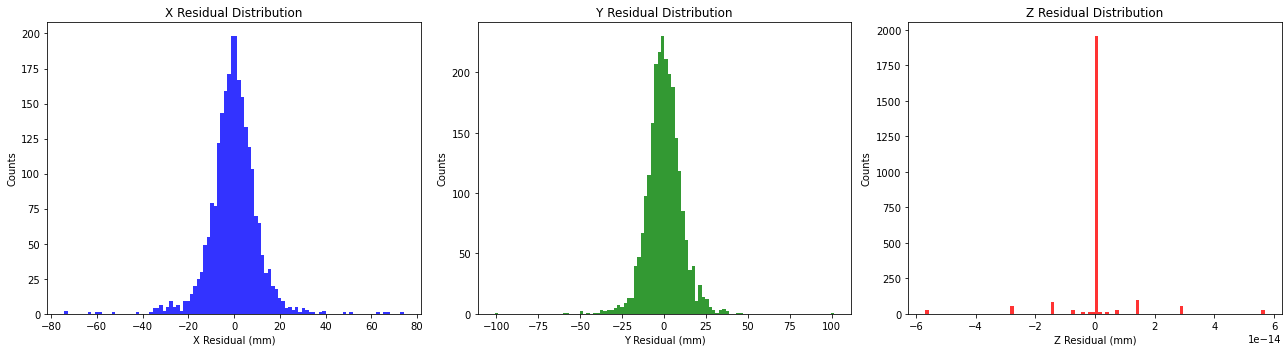

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# X residuals
axes[0].hist(x_residuals, bins=100, alpha=0.8, color='blue')
axes[0].set_title('X Residual Distribution')
axes[0].set_xlabel('X Residual (mm)')
axes[0].set_ylabel('Counts')

# Y residuals
axes[1].hist(y_residuals, bins=100, alpha=0.8, color='green')
axes[1].set_title('Y Residual Distribution')
axes[1].set_xlabel('Y Residual (mm)')
axes[1].set_ylabel('Counts')

# Z residuals
axes[2].hist(z_residuals, bins=100, alpha=0.8, color='red')
axes[2].set_title('Z Residual Distribution')
axes[2].set_xlabel('Z Residual (mm)')
axes[2].set_ylabel('Counts')

plt.tight_layout()
#plt.savefig("./plots/residual_genStat_1.png")
plt.show()


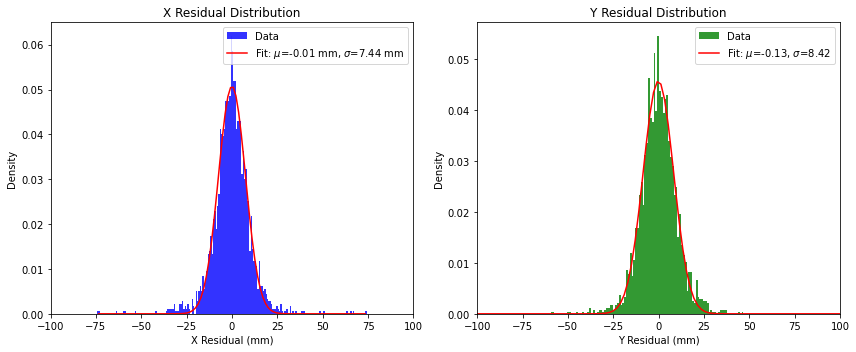

In [32]:
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Fit Gaussian to histogram data
def fit_gaussian(data, bins=100):
    hist, bin_edges = np.histogram(data, bins=bins, density=True)  # Get histogram
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

    # Initial guess for fitting [Amplitude, Mean, Sigma]
    p0 = [max(hist), np.mean(data), np.std(data)] 

    # Fit Gaussian
    popt, _ = curve_fit(gaussian, bin_centers, hist, p0=p0)

    return popt, bin_centers, hist

# Fit X and Y residuals
popt_x, x_bin_centers, x_hist = fit_gaussian(x_residuals)
popt_y, y_bin_centers, y_hist = fit_gaussian(y_residuals)

# Plot residual distributions with Gaussian fits
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# X residuals
axes[0].hist(x_residuals, bins=200, alpha=0.8, color='blue', density=True, label="Data")
axes[0].plot(x_bin_centers, gaussian(x_bin_centers, *popt_x), 'r-', label=f'Fit: $\mu$={popt_x[1]:.2f} mm, $\sigma$={popt_x[2]:.2f} mm')
axes[0].set_title('X Residual Distribution')
axes[0].set_xlabel('X Residual (mm)')
axes[0].set_ylabel('Density')
axes[0].set_xlim(-100,100)
axes[0].legend()

# Y residuals
axes[1].hist(y_residuals, bins=200, alpha=0.8, color='green', density=True, label="Data")
axes[1].plot(y_bin_centers, gaussian(y_bin_centers, *popt_y), 'r-', label=f'Fit: $\mu$={popt_y[1]:.2f}, $\sigma$={popt_y[2]:.2f}')
axes[1].set_title('Y Residual Distribution')
axes[1].set_xlabel('Y Residual (mm)')
axes[1].set_ylabel('Density')
axes[1].set_xlim(-100,100)
axes[1].legend()

plt.tight_layout()
#plt.savefig("./plots/fitted_genStat_3.png")
plt.show()

In [33]:
pT = df_track_intersections["pT"]
phi0 = df_track_intersections["phi0"]

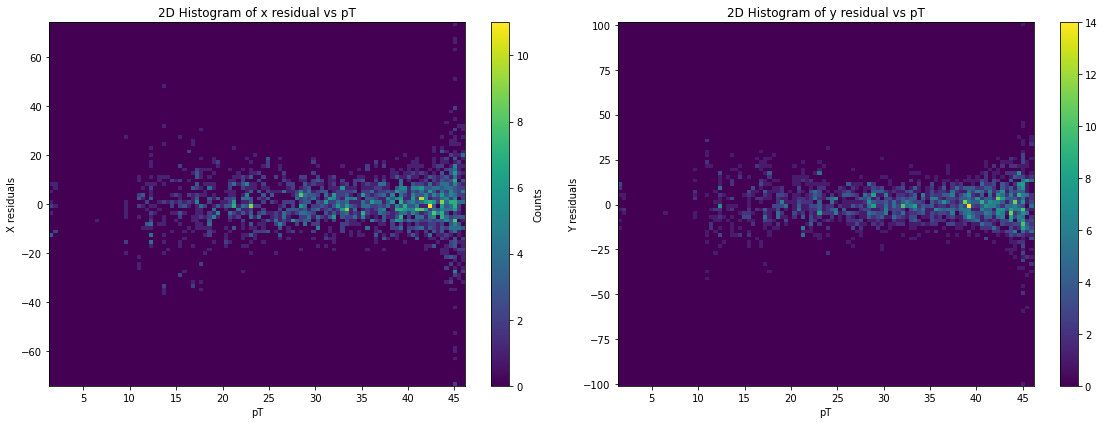

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# First plot: x residual vs pT
h1 = axs[0].hist2d(pT, x_residuals, bins= [100,100], cmap='viridis')
axs[0].set_xlabel('pT')
axs[0].set_ylabel('X residuals')
axs[0].set_title('2D Histogram of x residual vs pT')
#axs[0].set_ylim(-50,50)
plt.colorbar(h1[3], ax=axs[0], label='Counts')

# Second plot: y residual vs pT
h2 = axs[1].hist2d(pT, y_residuals, bins= [100,100], cmap='viridis')
axs[1].set_xlabel('pT')
axs[1].set_ylabel('Y residuals')
axs[1].set_title('2D Histogram of y residual vs pT')
#axs[1].set_ylim(-50,50)
plt.colorbar(h2[3], ax=axs[1])

plt.tight_layout()
#plt.ylim(-20,20)
#plt.savefig("plots/residual_vs_pT")
plt.show()


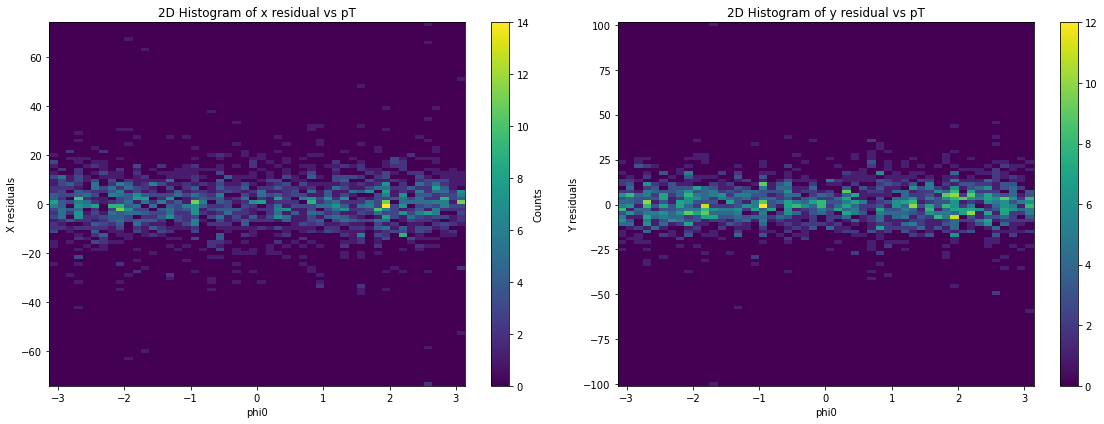

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# First plot: x residual vs pT
h1 = axs[0].hist2d(phi0, x_residuals, bins=[50,100], cmap='viridis')
axs[0].set_xlabel('phi0')
axs[0].set_ylabel('X residuals')
axs[0].set_title('2D Histogram of x residual vs pT')
plt.colorbar(h1[3], ax=axs[0], label='Counts')

# Second plot: y residual vs pT
h2 = axs[1].hist2d(phi0, y_residuals, bins=[50,100], cmap='viridis')
axs[1].set_xlabel('phi0')
axs[1].set_ylabel('Y residuals')
axs[1].set_title('2D Histogram of y residual vs pT')
plt.colorbar(h2[3], ax=axs[1])

plt.tight_layout()
#plt.savefig("plots/residual_vs_phi0")
plt.show()

### consider sensor position as hits

In [39]:
# B = 2  # inner_field (Solenoid Field) in hepSim website

# def compute_track_intersections(df_mcMuons, df_inTrackl0):
#     intersections = []
    
#     x_hit = 126.25316
#     y_hit = -28.81646
#     z_hit = 346.15
    
    
    
#     for track_index, track_row in df_mcMuons.iterrows():
        
#         dist = -1.
        
#         x0_values = np.array(track_row["x0"])
#         y0_values = np.array(track_row["y0"])
#         z0_values = np.array(track_row["z0"])
#         pT_values = np.array(track_row["pT"]) 
#         phi0_values = np.array(track_row["phi"])
#         charge_values = np.array(track_row["charge"])
#         tan_lambda_values = np.array(track_row["tan_lambda"]) 
#         lambda_angle_values = np.arctan(tan_lambda_values)

#         R_values = np.abs(pT_values/B)  #  R = pT/(qB), careful with units!
        
#         for muon_index in range(len(x0_values)):
#             x0 = x0_values[muon_index]
#             y0 = y0_values[muon_index]
#             z0 = z0_values[muon_index]
#             pT = pT_values[muon_index]
#             phi0 = phi0_values[muon_index]
#             charge = charge_values[muon_index]
#             tan_lambda = tan_lambda_values[muon_index]
#             lambda_angle = lambda_angle_values[muon_index]
#             R = R_values[muon_index]*1000 ##mm
#             #R = pT/(charge*B)
    
#             # calculate the helix path length 's' from z-equation
#             s_param = (z_hit - z0)/np.sin(lambda_angle)

#             # calculate intersection using helix equations clearly
#             x_intersect = x0 + R * (np.cos(phi0 + (charge * s_param * np.cos(lambda_angle)/R)) - np.cos(phi0))
#             y_intersect = y0 + R * (np.sin(phi0 + (charge * s_param * np.cos(lambda_angle) / R)) - np.sin(phi0))
#             z_intersect = z0 + s_param*np.sin(lambda_angle)

#             resid = np.sqrt((x_intersect-x_hit)**2 + (y_intersect-y_hit)**2 + (z_intersect-z_hit)**2 )
            
            
#             if (dist < 0 ) or resid < dist: 
#                 dist = resid
#                 min_track_index = track_index
#                 min_x_intersect = x_intersect
#                 min_y_intersect = y_intersect
#                 min_z_intersect = z_intersect

                
#         # Store with proper indexing information
#         if dist >= 0:
#             intersections.append({
#                 "track_index": min_track_index,
#                 "x_intersect": min_x_intersect,
#                 "y_intersect": min_y_intersect,
#                 "z_intersect": min_z_intersect,
#                 "x_hit": x_hit,
#                 "y_hit": y_hit,
#                 "z_hit": z_hit,
#                 "distance": dist
#             })
    
#     return pd.DataFrame(intersections)

# # # Run function
# df_track_sensor_intersections = compute_track_intersections(df_mcMuons, df_inTrackl0)

In [36]:
import plotly.graph_objects as go

# Convert to mm
x_mm = df_sensor["x (cm)"] * 10
y_mm = df_sensor["y (cm)"] * 10
z_mm = df_sensor["z (cm)"] * 10

# Create interactive 3D plot
fig = go.Figure(data=[go.Scatter3d(
    x=x_mm,
    y=y_mm,
    z=z_mm,
    mode='markers',
    marker=dict(
        size=4,
        color=df_sensor["Sensor"],  # Color by sensor index
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='X (mm)',
        yaxis_title='Y (mm)',
        zaxis_title='Z (mm)',
    ),
    title="Interactive 3D Sensor Layout (in mm)",
    width=800,
    height=600
)

fig.show()


In [121]:
df_inTrackl0.head()

positionX  \
0                        [-104.85628, 106.41928]   
1  [-15.532665, 28.282276, 28.313559, 30.056509]   
2                           [80.20015, -77.2365]   
3              [-93.786934, -93.70645, 95.96623]   
4                          [-54.182777, 57.7775]   

                                        positionY  \
0                          [-76.16574, 74.205795]   
1  [126.6885, -123.77849, -123.80859, -123.37353]   
2                          [-98.44132, 100.80475]   
3                  [90.04626, 90.10287, -87.3135]   
4                        [117.60614, -115.875015]   

                                       positionZ  \
0                         [94.79446, -92.079544]   
1  [-370.10223, 357.80847, 357.89365, 359.05435]   
2                      [118.995705, -122.128136]   
3            [-90.654724, -90.594604, 88.064255]   
4                         [-50.05051, 49.359276]   

                                                eDep  \
0                      [3.8663286e-05, 3.062841e-05]   
1  [8.884989e-05, 0.00010401332, 1.5464511e-05, 6...   
2                     [4.0143306e-05, 3.6078203e-05]   
3      [3.0876636e-05, 0.00051602675, 4.1464333e-05]   
4                      [3.688851e-05, 3.3966182e-05]   

                                          radius  \
0                         [129.59961, 129.73651]   
1  [127.63714, 126.968506, 127.00482, 126.98197]   
2                       [126.975426, 126.992424]   
3               [130.0166, 129.99779, 129.74269]   
4                         [129.48737, 129.48073]   

                                               phi  
0                          [-2.513379, 0.60890925]  
1  [1.6927927, -1.3461616, -1.3459742, -1.3318294]  
2                           [-0.887156, 2.2245846]  
3                 [2.37654, 2.375797, -0.73822266]  
4                            [2.002524, -1.108254]

In [37]:
def map_sensor_bounds(df_sensor, width_cm=3.01, height_cm=3.01):
 
    bounds = []

    for idx, row in df_sensor.iterrows():
        x_center = row["x (cm)"]
        y_center = row["y (cm)"]
        z_center = row["z (cm)"]

        bounds.append({
            "sensor_index": idx,
            "x_center": x_center,
            "y_center": y_center,
            "z_center": z_center,
            "x_min": x_center - width_cm / 2,
            "x_max": x_center + width_cm / 2,
            "y_min": y_center - width_cm / 2,
            "y_max": y_center + width_cm / 2,
            "z_min": z_center - height_cm / 2,
            "z_max": z_center + height_cm / 2,
        })

    return pd.DataFrame(bounds)

# Example usage
df_sensor_bounds = map_sensor_bounds(df_sensor)


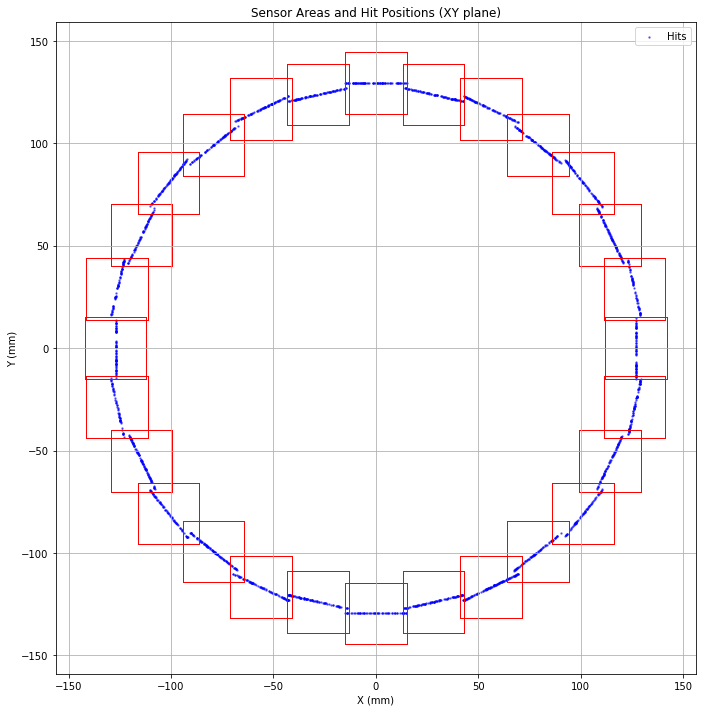

In [42]:
from matplotlib.patches import Rectangle

def plot_hits_and_sensors(df_inTrackl0, df_sensor, sensor_width=30.1, sensor_height=30.1):
    fig, ax = plt.subplots(figsize=(12, 10))

    # Plot hits
    all_x_hits = np.concatenate(df_inTrackl0["positionX"].values)
    all_y_hits = np.concatenate(df_inTrackl0["positionY"].values)
    ax.scatter(all_x_hits, all_y_hits, s=2, c='blue', alpha=0.5, label="Hits")

    # Plot sensors
    for _, row in df_sensor.iterrows():
        x_center = row["x (cm)"] * 10  # cm → mm
        y_center = row["y (cm)"] * 10

        # Draw rectangle centered at (x_center, y_center)
        rect = Rectangle(
            (x_center - sensor_width / 2, y_center - sensor_height / 2),
            sensor_width,
            sensor_height,
            linewidth=0.5,
            edgecolor='red',
            facecolor='none',
            alpha=0.6
        )
        ax.add_patch(rect)

    ax.set_xlabel("X (mm)")
    ax.set_ylabel("Y (mm)")
    ax.set_title("Sensor Areas and Hit Positions (XY plane)")
    ax.legend()
    ax.set_aspect('equal')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_hits_and_sensors(df_inTrackl0, df_sensor)

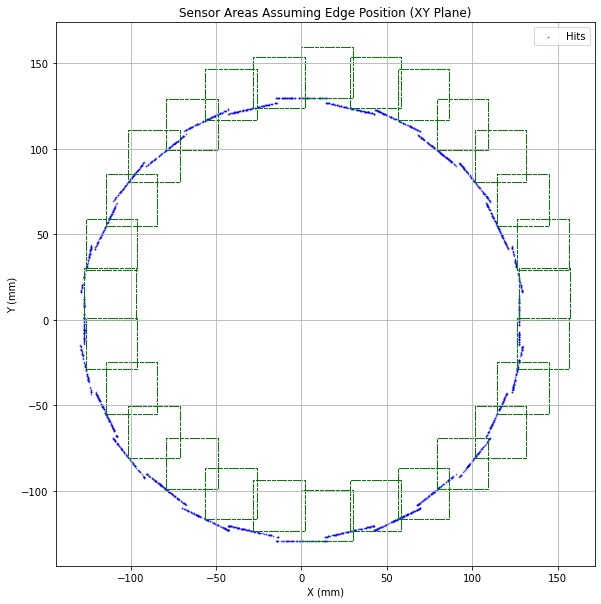

In [43]:
from matplotlib.patches import Rectangle

# Sensor dimensions (in mm)
sensor_width = 30.1
sensor_height = 30.1

# Flatten hit positions
x_hits = np.concatenate(df_inTrackl0["positionX"])
y_hits = np.concatenate(df_inTrackl0["positionY"])

# Plot setup
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_hits, y_hits, s=0.5, color="blue", alpha=0.6, label="Hits")

# Plot sensor rectangles assuming x,y are lower-left corner
for _, row in df_sensor.iterrows():
    x_edge = row["x (cm)"]*10
    y_edge = row["y (cm)"]*10
    rect = Rectangle((x_edge, y_edge), sensor_width, sensor_height,
                     linewidth=1, edgecolor='green', facecolor='none', linestyle="--")
    ax.add_patch(rect)

ax.set_aspect("equal")
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_title("Sensor Areas Assuming Edge Position (XY Plane)")
ax.legend()
plt.grid(True)
plt.show()

In [44]:
filtered_df = df_sensor[df_sensor["z (cm)"] == 46.655]

In [ ]:
# df_track_sensor_intersections.head()

In [ ]:
# # Flatten residual arrays
# x_residuals = df_track_sensor_intersections["x_hit"] - df_track_sensor_intersections["x_intersect"]
# y_residuals = df_track_sensor_intersections["y_hit"] - df_track_sensor_intersections["y_intersect"]
# z_residuals = df_track_sensor_intersections["z_hit"] - df_track_sensor_intersections["z_intersect"]

# fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# # X residuals
# axes[0].hist(x_residuals, bins=100, alpha=0.8, color='blue')
# axes[0].set_title('X Residual Distribution')
# axes[0].set_xlabel('X Residual (mm)')
# axes[0].set_xlim(-10000,10000)
# axes[0].set_ylabel('Counts')

# # Y residuals
# axes[1].hist(y_residuals, bins=100, alpha=0.8, color='green')
# axes[1].set_title('Y Residual Distribution')
# axes[1].set_xlabel('Y Residual (mm)')
# axes[1].set_ylabel('Counts')

# # Z residuals
# axes[2].hist(z_residuals, bins=100, alpha=0.8, color='red')
# axes[2].set_title('Z Residual Distribution')
# axes[2].set_xlabel('Z Residual (mm)')
# axes[2].set_ylabel('Counts')

# plt.tight_layout()
# #plt.savefig("./plots/sensor_residual.png")
# plt.show()